<a href="https://colab.research.google.com/github/timosplendor/Data-analysis/blob/main/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This project involves a step-by-step approach building a student academic performance prediction model using a decision tree:

1.	Data Collection: The first step I took was to gather a dataset that includes relevant features such as student demographics (age, gender, ethnicity), socioeconomic status, previous academic performance (grades, GPA), attendance records, study habits, extracurricular activities, and any other information that may impact academic performance. I ensured the dataset contains a continuous variable (GPA) to be predicted.

2.	Data Preprocessing: Clean the dataset by handling missing values, removing irrelevant features, and converting categorical variables into numerical representations. I used techniques like imputation, or label encoding.

3.	Data Split: Divide the dataset into training and testing sets. The training set was used to train the decision tree model, while the testing set was be used to evaluate its performance.

4.	Decision Tree Model Training: Use the training set I trained a decision tree classifier, Decision trees can handle both classification and regression tasks. The decision tree algorithm will learn to make decisions based on the input features to predict the student's academic performance.

5.	Model Evaluation: Evaluate the trained decision tree model using the testing set. Use appropriate evaluation metrics such as accuracy, precision, recall, F1-score, or mean squared error (MSE) to assess the model's performance.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/student_performance')

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
student = pd.read_csv('student.csv')
student

,LEVEL,FAMILY ANNUAL INCOME,CLASS POPULATION,SEX,TYPE OF SEC SCHOOL,READING HOUR PER WEEK,STUDYING DREAM COURSE,CGPA
0,Year 2,Medium,Greater than 50,Female,Public,1-5 HOURS,No,4.52
1,Year 4,Medium,Greater than 50,Female,Private,1-5 HOURS,No,2.35
2,Year 4,Medium,Greater than 50,Male,Public,1-5 HOURS,Yes,3.4
3,Year 1,Medium,Greater than 50,Female,Public,21-40 HOURS,No,3.82
4,Year 2,High,Greater than 50,Male,Private,5-20 HOURS,Yes,3.5
...,...,...,...,...,...,...,...,...
259,Year 3,Medium,Greater than 50,Male,Private,1-5 HOURS,Yes,4
260,Year 2,Medium,Greater than 50,Male,Public,5-20 HOURS,Yes,3.8
261,Year 3,Medium,Greater than 50,Male,Private,1-5 HOURS,Yes,3.9
262,Year 3,Medium,Greater than 50,Male,Private,1-5 HOURS,No,2.8


In [5]:
student['READING HOUR PER WEEK '].unique()

array(['1-5 HOURS', '21-40 HOURS', '5-20 HOURS', 'GREATER THAN 40'],
      dtype=object)

 # DATA PREPROCESSING AND CLEANING

In [6]:
# Check for missing values
print(student.isnull().sum())

LEVEL                     0
FAMILY ANNUAL INCOME      0
CLASS POPULATION          0
SEX                       0
TYPE OF SEC SCHOOL        0
READING HOUR PER WEEK     0
STUDYING DREAM COURSE     0
CGPA                      0
dtype: int64


In [7]:
student['FAMILY ANNUAL INCOME'] = student['FAMILY ANNUAL INCOME'].apply(lambda y: y.split(';')[0] if ';' in str(y) else y)
student['LEVEL'] = student['LEVEL'].apply(lambda y: y.split(';')[0] if ';' in str(y) else y)
student['CLASS POPULATION'] = student['CLASS POPULATION'].apply(lambda y: y.split(';')[0] if ';' in str(y) else y)
student['STUDYING DREAM COURSE'] = student['STUDYING DREAM COURSE'].apply(lambda y: y.split(';')[0] if ';' in str(y) else y)




In [8]:
#converse 25-nov and 10 jan that was mistakely capture to it true value in class population column
student['CLASS POPULATION'] = student['CLASS POPULATION'].apply(lambda x: "11-25" if x == "25-Nov" else x)
student['CLASS POPULATION'] = student['CLASS POPULATION'].apply(lambda D: "26-50" if D == "10-Jan" else D)
student['CLASS POPULATION'] = student['CLASS POPULATION'].apply(lambda D: "26-50" if D == "1-Jan" else D)

In [9]:
student['CLASS POPULATION'].unique()

array(['Greater than 50', '26-50', '11-25', '1-10'], dtype=object)

In [10]:
# Check condition and assign mode of the column if CGPA passes 5.0
mode_value = student['CGPA'].mode().iloc[0]
student.loc[student['CGPA'] == '2:52', 'CGPA'] = 'Specific value'
student['CGPA'] = pd.to_numeric(student['CGPA'], errors='coerce')  # Convert CGPA column to numeric
student.loc[student['CGPA'] > 5.0, 'CGPA'] = mode_value

In [11]:
student

,LEVEL,FAMILY ANNUAL INCOME,CLASS POPULATION,SEX,TYPE OF SEC SCHOOL,READING HOUR PER WEEK,STUDYING DREAM COURSE,CGPA
0,Year 2,Medium,Greater than 50,Female,Public,1-5 HOURS,No,4.52
1,Year 4,Medium,Greater than 50,Female,Private,1-5 HOURS,No,2.35
2,Year 4,Medium,Greater than 50,Male,Public,1-5 HOURS,Yes,3.4
3,Year 1,Medium,Greater than 50,Female,Public,21-40 HOURS,No,3.82
4,Year 2,High,Greater than 50,Male,Private,5-20 HOURS,Yes,3.5
...,...,...,...,...,...,...,...,...
259,Year 3,Medium,Greater than 50,Male,Private,1-5 HOURS,Yes,4.0
260,Year 2,Medium,Greater than 50,Male,Public,5-20 HOURS,Yes,3.8
261,Year 3,Medium,Greater than 50,Male,Private,1-5 HOURS,Yes,3.9
262,Year 3,Medium,Greater than 50,Male,Private,1-5 HOURS,No,2.8


In [12]:
student.columns

Index(['LEVEL', 'FAMILY ANNUAL INCOME', 'CLASS POPULATION', 'SEX',
       'TYPE OF SEC SCHOOL ', 'READING HOUR PER WEEK ',
       'STUDYING DREAM COURSE', 'CGPA'],
      dtype='object')

## LABEL ENCODING FOR SOME OF THE NON NUMERIC COLUMNS

Label encoding is a technique used to convert categorical variables into numerical labels. It assigns a unique numerical value to each category within a categorical feature

In [16]:
from sklearn.preprocessing import LabelEncoder


# Fill missing values with mode
student['FAMILY ANNUAL INCOME'] = student['FAMILY ANNUAL INCOME'].fillna(student['FAMILY ANNUAL INCOME'].mode().iloc[0])
student['STUDYING DREAM COURSE'] = student['STUDYING DREAM COURSE'].fillna(student['STUDYING DREAM COURSE'].mode().iloc[0])
student['CLASS POPULATION'] = student['CLASS POPULATION'].fillna(student['CLASS POPULATION'].mode().iloc[0])

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on each column Transform each column
student['FAMILY ANNUAL INCOME'] = encoder.fit_transform(student['FAMILY ANNUAL INCOME'])
student['STUDYING DREAM COURSE'] = encoder.fit_transform(student['STUDYING DREAM COURSE'])
student['SEX'] = encoder.fit_transform(student['SEX'])
student['CLASS POPULATION'] = encoder.fit_transform(student['CLASS POPULATION'])
student['READING HOUR PER WEEK '] = encoder.fit_transform(student['READING HOUR PER WEEK '])
student['TYPE OF SEC SCHOOL '] = encoder.fit_transform(student['TYPE OF SEC SCHOOL '])




In [17]:
student

,LEVEL,FAMILY ANNUAL INCOME,CLASS POPULATION,SEX,TYPE OF SEC SCHOOL,READING HOUR PER WEEK,STUDYING DREAM COURSE,CGPA
0,Year 2,2,3,0,1,0,0,4.52
1,Year 4,2,3,0,0,0,0,2.35
2,Year 4,2,3,1,1,0,1,3.4
3,Year 1,2,3,0,1,1,0,3.82
4,Year 2,0,3,1,0,2,1,3.5
...,...,...,...,...,...,...,...,...
259,Year 3,2,3,1,0,0,1,4.0
260,Year 2,2,3,1,1,2,1,3.8
261,Year 3,2,3,1,0,0,1,3.9
262,Year 3,2,3,1,0,0,0,2.8


In [25]:
import matplotlib.pyplot as plt



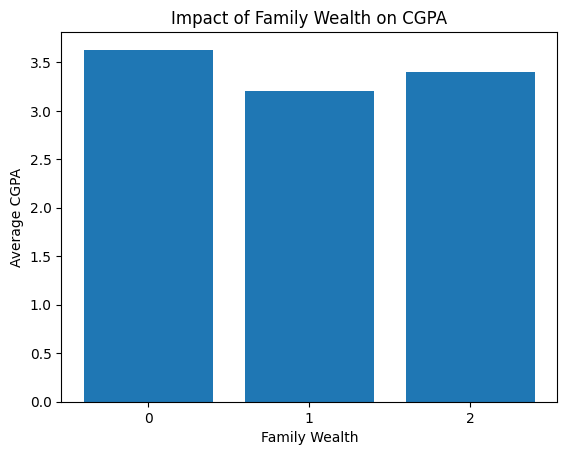

In [32]:
# Group students by family wealth and calculate the average CGPA
wealth_groups = student.groupby('FAMILY ANNUAL INCOME')['CGPA'].median()

# Convert the wealth groups to strings
wealth_categories = wealth_groups.index.astype(str)

# Plot the bar chart
plt.bar(wealth_categories, wealth_groups.values)
plt.xlabel('Family Wealth')
plt.ylabel('Average CGPA')
plt.title('Impact of Family Wealth on CGPA')
plt.show()

In [ ]:
print(student.columns)


In [ ]:
# Separate the independent variables (features)
variable_names = ['FAMILY ANNUAL INCOME', 'CLASS POPULATION', 'SEX',
       'TYPE OF SEC SCHOOL ', 'READING HOUR PER WEEK ',
       'STUDYING DREAM COURSE']
features = student[variable_names]

# Separate the target variable
target_variable = student['CGPA']

# Display the features
features

In [ ]:
# Handle missing values by filling with mean
features = features.fillna(features.mean())
target_variable = target_variable.fillna(target_variable.mean())

In [ ]:
# Discretize the target variable into three classes since decision treec ann not handle continous data
# Define the bins for discretization
bins = [0,1.99, 2.99, 3.99, 4.99] # Example bin edges

# Convert the continuous target variable into categorical labels
labels = [ 'THIRD CLASS','SECOND CLASS LOWER', 'SECOND CLASS UPPER', 'FIRST CLASS']  # Example class labels
discretized_target = pd.cut(target_variable, bins=bins, labels=labels)


## Dividing the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, discretized_target, test_size=0.2, random_state=42)

## Using the training dataset to train a decision tree classifier

In [ ]:
# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

## making prediction using the test data

In [ ]:

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
#accuracy = accuracy_score(y_test, y_pred)
#print('Accuracy:', accuracy)
y_pred

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

## Model evaluation using precision, recall, F1 score, and confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate precision, recall, and F1 score
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

## Hyperparameter Tuning to improve the model's performance

In [ ]:
# Create a decision tree classifier
classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=2, criterion='gini')

# Train the classifier on the training data
classifier.fit(X_train, y_train)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

## Model Interpretation

Access the decision tree model trained on your data (classifier) and visualize its structure using graphical representations such as plot_tree from the sklearn.tree module. This will give you a visual representation of how the tree is structured, including the decision rules and the flow of the tree.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10, 8))
tree.plot_tree(classifier, filled=True)
plt.show()

In [ ]:
feature_importance = classifier.feature_importances_

## Below is a visualization to gain insights into the decision-making process of the model and identify the key factors that influence academic performance according to the model's perspective.

In [ ]:
  import numpy as np

plt.figure(figsize=(8, 6))
plt.barh(variable_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree - Feature Importance')
plt.show()

From the bar chat above it indicate that Reading hours and family annual income plays a major in the performance of a student and sex have less significant impart on the performance of the student.